# LetsGrowMore VIP in Data Science
# Batch: November 2021
# Author: Poonam kumari
# 2-Intermediate Level Task
# Prediction using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1=df.rename(columns={'SepalLengthCm':'sepal_length','SepalWidthCm':'sepal_width','PetalLengthCm':'petal_length',
                  'PetalWidthCm':'petal_width','Species':'species'})

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df1.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df1.isna().sum()

Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df1.duplicated().sum()

0

In [9]:
df1['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df1['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()
df1.species=le.fit_transform(df1.species)

In [13]:
df1.head(5)

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
x=df1.drop('species',axis=1)
y=df1.species

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
dtc=DecisionTreeClassifier()

In [18]:
print(x_train.shape)
print(x_test.shape)

(120, 5)
(30, 5)


In [19]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
dtc.score(x_test,y_test)

1.0

In [21]:
y_pred=dtc.predict(x_test)

In [22]:
print(y_pred)

[0 1 0 0 2 1 0 2 2 1 1 0 1 2 1 1 0 2 0 0 2 1 0 1 1 0 2 1 2 1]


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


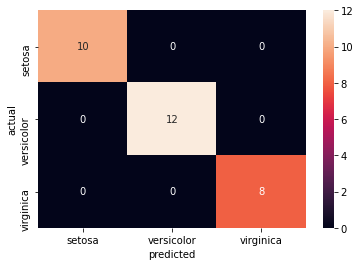

In [29]:
heat=pd.DataFrame(cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
sns.heatmap(heat,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()